# <span style="color: #007BFF; font-size: 24px; font-weight: bold;">Bienvenidos al Bootcamp Data Science & Analítica de Datos I - RMS TITANIC </span>
<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.6; color: #333;">
    
- [Capítulo 1: Sobre los Datos ](#EDA-Titanic)
- [Capítulo 2: Visualizaciones Titanic ](#visualizacion)
- [Capítulo 3: ML y algoritmos de Clasificación ](#modelos-clasificacion)

<div style="font-family: 'Arial', sans-serif; font-size: 16px; line-height: 1.6; color: #333;">


**¿Cómo podría haber ayudado la IA?**


<figure>
<center>
<img src='https://upload.wikimedia.org/wikipedia/commons/thumb/f/fd/RMS_Titanic_3.jpg/1920px-RMS_Titanic_3.jpg' width="650" height="250" />
<figcaption></figcaption></center>
</figure>

In [85]:
# importamos librerias para procesamiero de datos y gráficas
import os
import pandas as pd
import numpy as np
import seaborn as sns
import warnings
import matplotlib.pyplot as plt
import statsmodels.api as sm
%matplotlib inline

# Ignore warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action="ignore", category=FutureWarning)
plt.rcParams["figure.figsize"] = [10, 5]

# importamos librerias para modelos de clasificación 
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

<a id="EDA-Titanic"></a>

# **Capítulo 1: Sobre los Datos**

**Vamos a extraer nuestros datos del *Titanic* desde el archivo .csv, crear un DataFrame de pandas y revisar los indicadores disponibles. Este conjunto de datos contiene información de 891 pasajeros con 12 atributos diferentes:**

Variable                  | Descripción                                                                      | Tipo
--------------------------|----------------------------------------------------------------------------------|------------------------------
**Sobrevivió (Survived)** | Resultado de la supervivencia (0 = No; 1 = Sí)                                   | *Variable binaria*
**Clase (Pclass)**        | Clase socioeconómica (1 = Clase alta; 2 = Clase media; 3 = Clase baja)           | *Variable categórica ordinal*
**Nombre (Name)**         | Nombre del pasajero                                                              | *Variable de texto*
**Sexo (Sex)**            | Sexo del pasajero                                                                | *Variable categórica nominal*
**Edad (Age)**            | Edad del pasajero (Algunas entradas contienen NaN)                               | *Variable numérica continua*
**SibSp**                 | Número de hermanos y cónyuges del pasajero a bordo                               | *Variable numérica discreta*
**Parch**                 | Número de padres e hijos del pasajero a bordo                                    | *Variable numérica discreta*
**Ticket**                | Número de boleto del pasajero                                                    | *Variable de texto*
**Tarifa (Fare)**         | Tarifa pagada por el pasajero                                                    | *Variable numérica continua*
**Cabina (Cabin)**        | Número de cabina del pasajero (Algunas entradas contienen NaN)                   | *Variable de texto*
**Embarcado (Embarked)**  | Puerto de embarque del pasajero (C = Cherburgo; Q = Queenstown; S = Southampton) | *Variable categórica nominal*
 


Con el siguiente comando podemos extraer información almacenada en archivos csv, empleando la librería pandas, abreviada como pd. Para ello, apuntaremos a la URL en la que se encuentran almacenados los datos.

In [86]:
full_data = pd.read_csv('/BOBJ/storage/JMPA/Bootcamp/Data/Inputs/Titanic-Dataset.csv')

Ahora, podemos explorar diferentes atributos del ABT. Haciendo mención del abt y llamando el método shape, podemos obtener la dimensión de nuestro dataframe.

In [87]:
full_data.shape

(891, 12)

¡Muy bien! Encontramos que nuestro abt tiene 891 registros de 12 columnas o campos diferentes. 

Para explorar estos campos, hacemos uso del método head(). Este método va a retornar las 5 primeras filas del dataframe por default, pero si incluímos cualquier número entero positivo, nos retornará esa cantidad de filas. 

In [88]:
full_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [89]:
full_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


Así, observamos los diferentes campos que tiene el abt. Previamente se mencionó que significa cada uno de los campos.

### **Ejercicio #1:**

Ahora, es tu turno de completar las definiciones de algunos tipos de variable del abt.

- PassengerId: variable categórica nominal.
- Age: variable numérica discreta.
- Survived: variable _____.
- Pclass: variable ____.
- Sex: variable ____.
- Parch: variable ____.
- Fare: variable ____.
- Cabin: variable ____.
- Embarked: variable ____.

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">1.1. Atributos de los datos</span>

Ahora, podemos explorar los atributos y formatos de nuestros datos en el abt. Esto es independiente del tipo de variable que refleje cada uno de los datos.

Acá podemos encontrar diversos tipos de dato. Para el ejercicio, tenemos los siguientes:

- int64: refleja una variable con valores numéricos enteros.
- float64: refleja una variable con valores numéricos decimales.
- object: refleja una variable con una cadena de texto.

Para revisar estos tipos de dato, podemos hacer uso del método info() sobre nuestro abt.

In [90]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">1.2. Exploración descriptiva</span>

Para hacer una exploración **descriptiva** inicial de las variables, podemos emplear el método describe() sobre nuestro abt. Este nos retornará diferentes estadísticas descriptivas de las variables como:

**Aplican para todo tipo de variable**
- count: cantidad de registros.

**Solo aplican para variables object**
- unique: cantidad de registros únicos.
- top: valor más frecuente.
- freq: cantidad de observaciones del valor top.

**Solo aplican para variables numéricas**
- mean: valor promedio de la variable.
- std: desviación estándar de la variable.
- min: valor mínimo de la variable.
- 25%: percentil 25 de la variable.
- 50%: percentil 50 de la variable.
- 70%: percentil 75 de la variable.
- max: valor máximo de la variable.

In [91]:
summary = full_data.describe(include = 'all')
print(summary)

        PassengerId    Survived      Pclass                     Name   Sex  \
count    891.000000  891.000000  891.000000                      891   891   
unique          NaN         NaN         NaN                      891     2   
top             NaN         NaN         NaN  Braund, Mr. Owen Harris  male   
freq            NaN         NaN         NaN                        1   577   
mean     446.000000    0.383838    2.308642                      NaN   NaN   
std      257.353842    0.486592    0.836071                      NaN   NaN   
min        1.000000    0.000000    1.000000                      NaN   NaN   
25%      223.500000    0.000000    2.000000                      NaN   NaN   
50%      446.000000    0.000000    3.000000                      NaN   NaN   
75%      668.500000    1.000000    3.000000                      NaN   NaN   
max      891.000000    1.000000    3.000000                      NaN   NaN   

               Age       SibSp       Parch  Ticket        Fare 

Este método está calculando las estadísticas descriptivas ligadas al tipo de objeto en que se almacena cada variable. 

**¿Es relevante calcular la media, desviación estándar y percentiles de una variable como el número de identificación?** No lo es, porque conocemos que esta variable es una variable categórica nominal, a pesar de que se guarda en un tipo de dato numérico.

Otras variables con esta misma problemática son Pclass, que conocemos que es una variable categórica ordinal; y el número del ticket, que conocemos que es una variable categórica nominal.

## **Variables numéricas**

### Univariado

Haciendo un foco específicamente a las variables numéricas, podemos llamar específicamente alguna de las estadísticas descriptivas.

Por ejemplo, podemos estimar el promedio de la variable age (edad) de la siguiente forma:

In [92]:
full_data.Age.mean()

29.69911764705882

También se pueden calcular otras estadísticas descriptivas, como la desviación estándar, el mínimo, máximo, y algun percentil.

- Desviación estándar: full_data.Age.std()
- Mínimo: full_data.Age.min()
- Máximo: full_data.Age.max()
- Percentil 25: full_data.Age.quantile(0.25)

In [93]:
## Tu código para la desviación estándar de Fare va aquí

In [94]:
## Tu código para el valor máximo de Fare va aquí

In [95]:
## Tu código para el percentil 90 de Fare va aquí

### Bivariado

También podemos hacer una revisión de las correlaciones entre dos variables. 

In [96]:
full_data.Age.corr(full_data.Fare)

0.09606669176903887

De esto, obtenemos que la correlación entre la edad del pasajero y el valor del ticket pagado es de 0.09, lo cual es una correlación baja teniendo en cuenta que los valores pueden ir de -1 a 1, donde -1 refleja una correlación perfecta negativa, y 1 una correlación perfecta positiva.

## **Variables categóricas**

### Univariado

Podemos obtener una representación de una tabla de frecuencias de las variables categóricas de la base. Por ejemplo, para la variable que refleja el puerto de embarcación:


In [97]:
full_data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

Donde observamos que el puerto más frecuente de embarcación es S, que representa el puerto de Southampton.

También podemos obtener esto de forma relativa, es decir, los porcentajes de cada puerto para el total de la base. Para ello se debe incluir *normalize=True* en el paréntesis del método.

In [98]:
full_data['Embarked'].value_counts(normalize = True)

S    0.724409
C    0.188976
Q    0.086614
Name: Embarked, dtype: float64

Observamos que el 72.44% de la base proviene del puerto de Southampton, y el restante de los puertos de Cherburgo (C) y Queenstown (Q).

### Bivariado

Podemos obtener una tabla cruzada entre dos variables categóricas, como pueden ser el la clase (Pclass) y género (Sex).

In [99]:
pd.crosstab(full_data['Pclass'], full_data['Sex'])

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


Donde observamos que lo más frecuente es ser hombres de clase baja (clase 3).

Esto también se puede establecer en porcentajes o frecuencias relativas, incluyendo el parámetro de *normalize = True* en el método.

In [100]:
pd.crosstab(full_data['Pclass'], full_data['Sex'], normalize = True)

Sex,female,male
Pclass,,
1,0.105499,0.136925
2,0.085297,0.121212
3,0.161616,0.389450


Encontramos que el 38.94% de los pasajeros son hombres de clase baja. Un 10.54% son de los pasajeros son mujeres de clase alta.

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">1.3. Manejo de la base</span>

## **Filtrado de la base**

Para el propósito del ejercicio, conocemos que existen algunas variables que no nos aportan mucha información más allá de poder identificar al pasajero. Estas variables son:

- Nombre del pasajero.
- Id del pasajero.
- Número de ticket del pasajero.
- Cabina del pasajero.

Estas variables se pueden borrar del dataframe de la siguiente forma, y se van separando por ',' en el listado:


In [101]:
full_data = full_data.drop(['Name', 'PassengerId', 'Ticket', 'Cabin'], axis = 1)

Explorando el abt, observaremos que no están las variables eliminadas.

In [102]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">1.4. Tratamiento de valores faltantes</span>

Nuestro ABT puede tener una gran variedad de problemas. Entre ellos, el hecho de que puedan existir datos faltantes en alguna de las variables.

Podemos obtener la cantidad de datos faltantes de cada uno de nuestros campos con el método isnull().sum() sobre nuestro abt.

In [103]:
full_data.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

Encontramos que únicamente la variable edad (177 valores nulos) y el puerto de embarcación (2) tienen valores faltantes.

Para tratar estos casos, hay diferentes alternativas:

1. Imputación de los datos con algún método: puede ser útil si tenemos forma de segmentar los datos por poblaciones pequeñas.
2. Eliminar los datos: puede ser útil en poblaciones grandes donde perder un porcentaje de la población no es relevante.
3. No hacer nada: puede ser relevante si el hecho de que haya un valor perdido tiene un significado sobre la base.

### **Imputación - Variable Age**

En este caso, no tenemos la información completa de la variable edad, que es muy útil para describir a la población.

Teniendo en cuenta que la población es pequeña, y que la variable edad puede ser muy relevante, decidimos imputarla con algún método.

El método seleccionado es imputar con la mediana segmentando por las variables género (Sex) y clase (Pclass).

In [104]:
full_data['Age'] = full_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.mean()))

Validamos que la información se encuentre completa, volviendo a contar la cantidad de valores faltantes para la columna edad.

In [105]:
full_data['Age'].isnull().sum()

0

### **Imputación - Variable Embarked**

También vamos a imputar la variable Embarked, que tiene solo 2 valores faltantes.
 
Emplearemos la misma segmentación de género (Sex) y clase del tiquete (Pclass), y se imputará con el valor más frecuente de esas categorías.

In [106]:
full_data['Embarked'] = full_data.groupby(['Sex', 'Pclass'])['Embarked'].transform(lambda x: x.fillna(x.mode()[0]))

Validamos que la información se encuentre completa, volviendo a contar la cantidad de valores faltantes para la columna Embarked.

In [107]:
full_data['Embarked'].isnull().sum()

0

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">1.5. Tratamiento variables  ordinales y categóricas</span>

In [108]:
full_data.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

Conocemos que la única variable categórica ordinal que existe en nuestro dataset es la clase (Pclass), donde 3 es la clase más baja y 1 es la más alta.

Podemos definir el orden de las clases en un listado, mencionandolas de la más alta (1. Clase alta) a la más baja (3. Clase baja).

In [109]:
pclass_categories = [1, 2, 3]  # Define el orden de las clases

Posteriormente, podemos crear las variables categoricas ordinales de la siguiente forma:

In [110]:
full_data['Pclass'] = pd.Categorical(full_data['Pclass'], categories = pclass_categories, ordered = True)

Y podemos validar que ahora el tipo de variable es categórica:

In [111]:
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   Survived  891 non-null    int64   
 1   Pclass    891 non-null    category
 2   Sex       891 non-null    object  
 3   Age       891 non-null    float64 
 4   SibSp     891 non-null    int64   
 5   Parch     891 non-null    int64   
 6   Fare      891 non-null    float64 
 7   Embarked  891 non-null    object  
dtypes: category(1), float64(2), int64(3), object(2)
memory usage: 49.9+ KB


## **Label Encoding y One-Hot Encoding**

son dos técnicas comunes para convertir variables categóricas en representaciones numéricas que pueden ser utilizadas por modelos de machine learning. Sin embargo, tienen diferencias clave en cómo transforman los datos y cómo los modelos interpretan estas representaciones.

### Label Encoding

Asigna un número entero único a cada categoría de la variable. Adecuado para Variables Ordinales: Funciona bien cuando las categorías tienen un orden natural (por ejemplo, Bajo, Medio, Alto).

In [112]:
cat_features = ['Sex']

# Codificar variables categóricas
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    full_data[col] = le.fit_transform(full_data[col].astype(str))
    label_encoders[col] = le

### One-Hot Encoding

Convierte cada categoría en una nueva columna binaria, donde cada columna contiene un 1 o 0 para indicar la presencia o ausencia de la categoría.

In [113]:
# Aplicamos One Hot Encoding a la columna 'Embarked'
embarked_dummies = pd.get_dummies(full_data['Embarked'], prefix='Embarked')

# Concatenamos las nuevas columnas al DataFrame original
full_data = pd.concat([full_data, embarked_dummies], axis=1)

In [114]:
full_data.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,1,1,0,38.0,1,0,71.2833,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,1
3,1,1,0,35.0,1,0,53.1000,S,0,0,1
4,0,3,1,35.0,0,0,8.0500,S,0,0,1


<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">1.6. Identificacion y tratamiento de valores Outliers</span>

El tratamiento de valores outliers (valores atípicos) en un dataset es un paso importante en el preprocesamiento de datos, ya que los outliers pueden influir negativamente en los modelos estadísticos y de machine learning.


Utilizar gráficos como boxplots, scatter plots, y histograms para visualizar y detectar outliers.

* **Método de los Cuartiles (IQR)**: Los valores que están por debajo de Q1 - 1.5 * IQR o por encima de Q3 + 1.5 * IQR se consideran outliers.
* **Z-Score**: Los valores que están a más de un cierto número de desviaciones estándar de la media (por ejemplo, 3 desviaciones estándar) son considerados outliers.



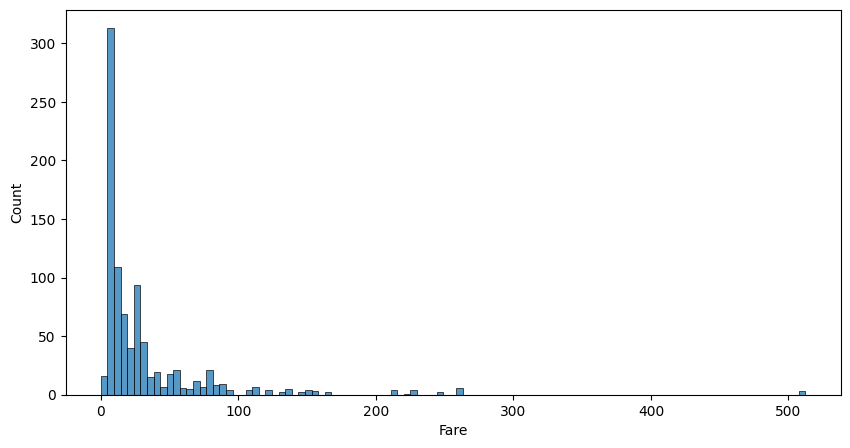

In [115]:
sns.histplot(full_data['Fare'],kde=False)
plt.show()

In [116]:
# Verificar el resultado
print(full_data['Fare'].describe())

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64


### Métodos de Tratamiento de Outliers:

Identificación: El rango intercuartílico (IQR) es la diferencia entre el tercer cuartil (Q3) y el primer cuartil (Q1). Los valores fuera del rango [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] son considerados outliers.

In [117]:
##  método IQR
Q1 = full_data['Fare'].quantile(0.25)
Q3 = full_data['Fare'].quantile(0.75)
IQR = Q3 - Q1

# Definir límites
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Reemplazar valores por los límites inferiores o superiores
full_data['Fare'] = full_data['Fare'].apply(lambda x: lower_bound if x < lower_bound else upper_bound if x > upper_bound else x)

# Verificar el resultado
print(full_data['Fare'].describe())

count    891.000000
mean      24.046813
std       20.481625
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max       65.634400
Name: Fare, dtype: float64


<AxesSubplot:xlabel='Fare', ylabel='Count'>

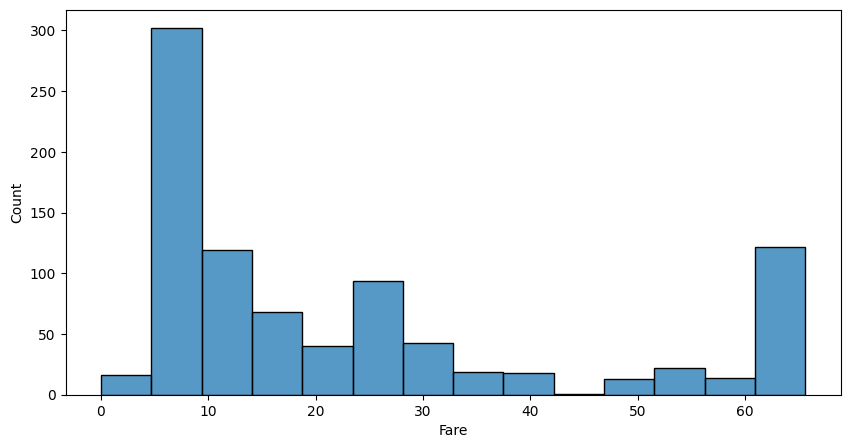

In [118]:
sns.histplot(full_data['Fare'],kde=False)

In [119]:
df_0 = full_data.copy()

<a id="visualizacion"></a>
# **Capítulo 2: Visualizaciones Titanic**


<figure>
<center>
<img src='https://dantaanalytics.com/wp-content/uploads/2020/10/data-visualization.jpg' width="650" height="450" />
<figcaption></figcaption></center>
</figure>




La visualización de datos es una herramienta esencial en la ciencia de datos que permite transformar datos complejos en representaciones visuales fáciles de interpretar. A través de gráficos, diagramas y otros elementos visuales, es posible identificar patrones, tendencias y relaciones en los datos que de otra manera podrían pasar desapercibidos.

En el contexto de la clasificación binaria, como en el caso de los sobrevivientes del Titanic, la visualización de datos juega un papel crucial. Al analizar datos de pasajeros como edad, género, clase de boleto y su estado de supervivencia, las visualizaciones permiten descubrir rápidamente cuáles de estos factores influyeron más en la probabilidad de sobrevivir. Por ejemplo, un gráfico de barras puede mostrar de manera clara cómo la tasa de supervivencia varía según la clase de boleto o el género.

In [120]:
full_data = pd.read_csv('/BOBJ/storage/JMPA/Bootcamp/Data/Inputs/Titanic-Dataset.csv')

In [121]:
print(full_data.shape)
full_data.head()

(891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">2.1.  Gráficos de cantidades</span>

### **Gráficos de Barras**

Utilizados para comparar diferentes categorías entre sí. Las barras pueden ser verticales u horizontales.



<AxesSubplot:xlabel='Pclass', ylabel='count'>

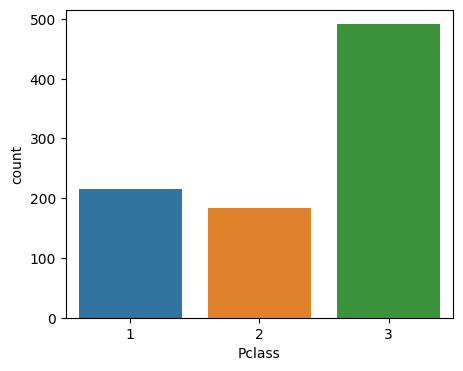

In [122]:
# Grafico de barras horizontales
plt.figure(figsize=(5, 4))
sns.countplot(x='Pclass', data=full_data)

Text(0.5, 1.0, 'Distribución de Pasajeros por Clase')

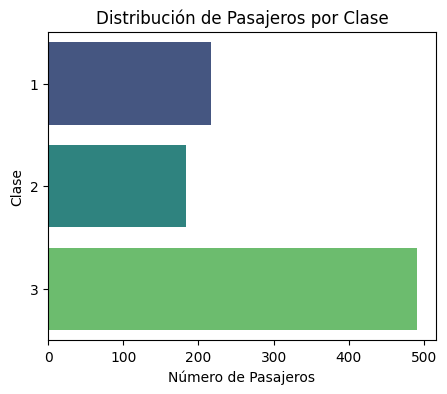

In [123]:
# Grafico de barras verticales
plt.figure(figsize=(5, 4))
sns.countplot(y='Pclass', data=full_data, palette='viridis')

# Añadir etiquetas y título
plt.ylabel('Clase')
plt.xlabel('Número de Pasajeros')
plt.title('Distribución de Pasajeros por Clase')

**Se observa que la mayor cantidad de pasajeros eran de la clase 3**

### **Gráfico de barras abierto por otra variable categórica**

<AxesSubplot:xlabel='Pclass', ylabel='count'>

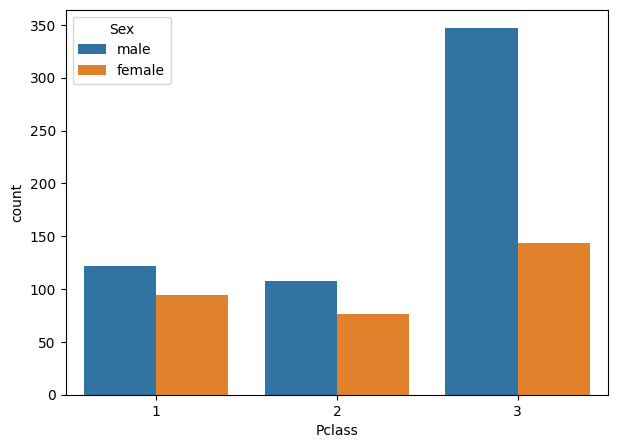

In [124]:
# Gráfico de barras para dos variables categóricas 
plt.figure(figsize=(7,5))
sns.countplot(x='Pclass', hue='Sex', data=full_data)

**Se puede ver que la clase 3 tiene más mujeres que las otras clases, sin embargo, la proporción respecto de los hombres de esa clase es mucho menor**

**Otro ejemplo**: gráfico de barras por Género y Clase, comparando total pasajeros vs sobreviviente

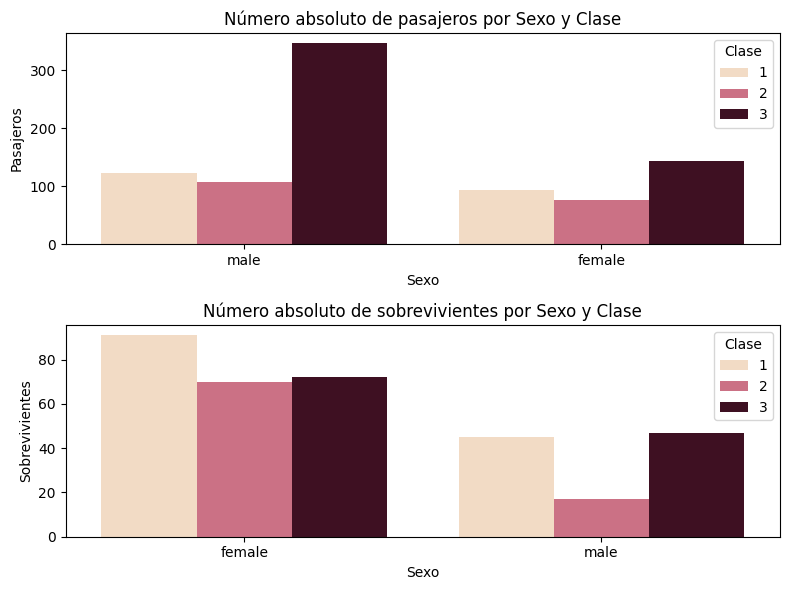

In [125]:
fig, axs = plt.subplots(2, 1, figsize=(8, 6))
# Configuración de colores
palette = ["#f9dbbd", "#DA627D", "#450920"]  # Paleta azul para las clases

# Primer gráfico: Número absoluto de pasajeros por Sexo y Clase
sns.countplot(x="Sex", hue="Pclass", data=full_data, palette=palette, ax=axs[0])
axs[0].set_title("Número absoluto de pasajeros por Sexo y Clase")
axs[0].set_xlabel("Sexo")
axs[0].set_ylabel("Pasajeros")
axs[0].legend(title="Clase")

# Segundo gráfico: Número absoluto de sobrevivientes por Sexo y Clase
sns.countplot(x="Sex", hue="Pclass", data=full_data[full_data.Survived==1], palette=palette, ax=axs[1])
axs[1].set_title("Número absoluto de sobrevivientes por Sexo y Clase")
axs[1].set_xlabel("Sexo")
axs[1].set_ylabel("Sobrevivientes")
axs[1].legend(title="Clase")

# Ajuste de diseño para evitar superposiciones
plt.tight_layout()
plt.show()

 **Como podemos ver, sobrevivieron más mujeres que hombres.**

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">2.2 Gráficos de Distribución</span>

Los gráficos de distribución son herramientas visuales utilizadas para mostrar cómo se distribuyen los datos de una variable o conjunto de variables en un dataset. Estos gráficos ayudan a identificar patrones como la forma, dispersión, centralidad y presencia de outliers en los datos. Son fundamentales en el análisis exploratorio de datos porque permiten a los analistas entender rápidamente las características clave de los datos.

## **Histograma**

Es similar a un gráfico de barras, pero se utiliza para representar la distribución de una variable continua.

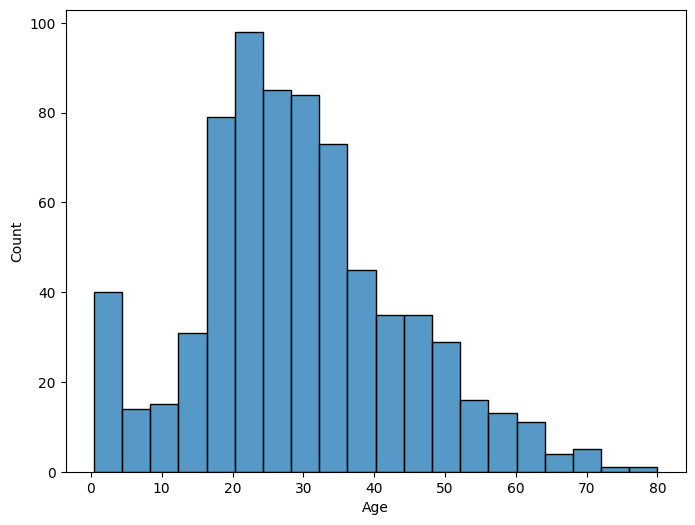

In [126]:
plt.figure(figsize=(8,6))
sns.histplot(full_data['Age'])
plt.show()

### **Gráfico o curva de densidad**

Es una curva suavizada que muestra la distribución de los datos, proporcionando una visión más continua que el histograma. Generalmente se conoce como Curva de Densidad Estimada (KDE)

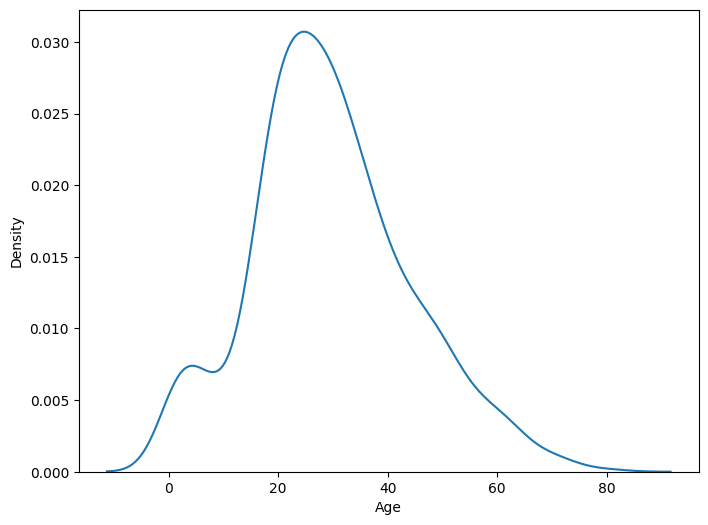

In [127]:
plt.figure(figsize=(8,6))
sns.distplot(full_data['Age'], hist=False)
plt.show()

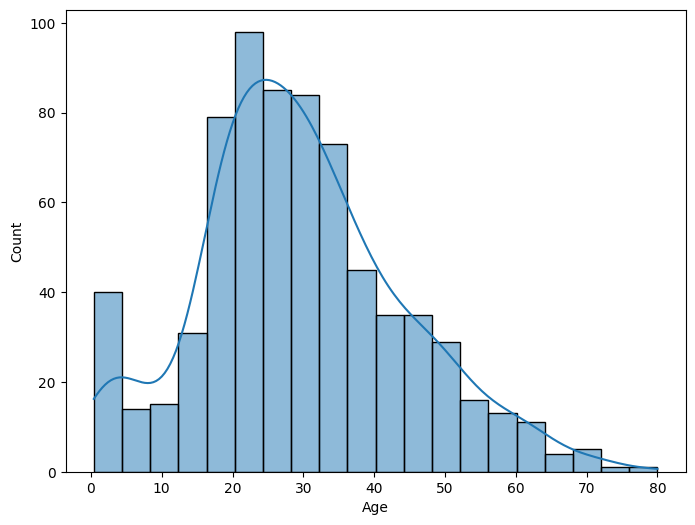

In [128]:
# gráfico de barras , incluyendo la desidad
plt.figure(figsize=(8,6))

sns.histplot(full_data['Age'], kde=True)
plt.show()

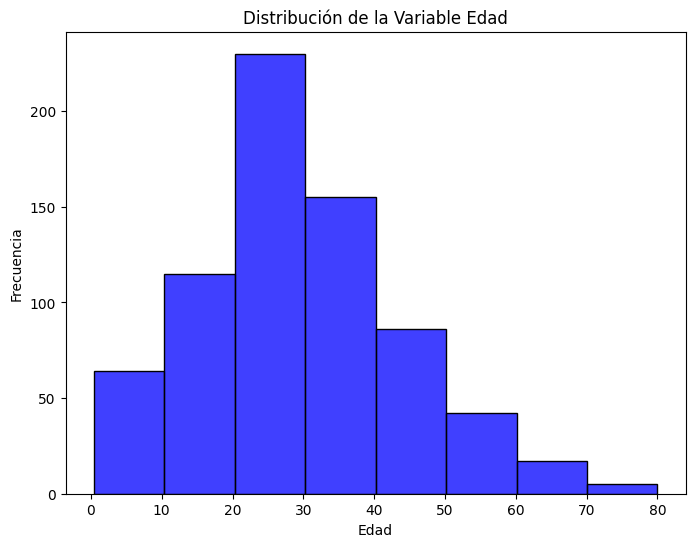

In [129]:
#creación de histograma reduciendo el número de agrupaciones

plt.figure(figsize=(8, 6))
sns.histplot(full_data['Age'], bins=8, kde=False, color='blue')
plt.title('Distribución de la Variable Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.show()

### **Diagramas de torta**


Un diagrama de torta, también conocido como gráfico de pastel o gráfico circular, es un tipo de gráfico que se utiliza para representar la proporción de diferentes categorías dentro de un conjunto de datos. En este gráfico, los datos se visualizan como "rebanadas" de un círculo, donde el tamaño de cada rebanada es proporcional al porcentaje o proporción que esa categoría representa del total. Para entender mejor la composición de los pasajeros en el conjunto de datos, se puede utilizar un gráfico de torta. Este gráfico visualiza la proporción de cada categoría de género dentro del total de pasajeros.


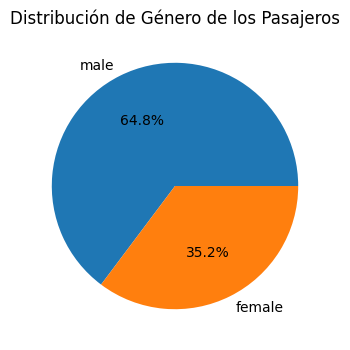

In [130]:
# Crear el gráfico de torta para la distribución de género
gender_counts = full_data['Sex'].value_counts()
plt.figure(figsize=(6, 4))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%')
plt.title('Distribución de Género de los Pasajeros')
plt.show()

### **Boxplot**

Es una forma conveniente de visualizar la distribución de los datos a través de sus cuartiles. Los diagramas de caja suelen tener líneas verticales que se extienden desde las cajas, llamadas <strong>bigotes</strong>. Estos bigotes indican la variabilidad fuera de los cuartiles superior e inferior, por lo que los Boxplots también se conocen como <strong>diagrama de caja y bigotes</strong>. Los valores atípicos en los datos se representan como puntos individuales.

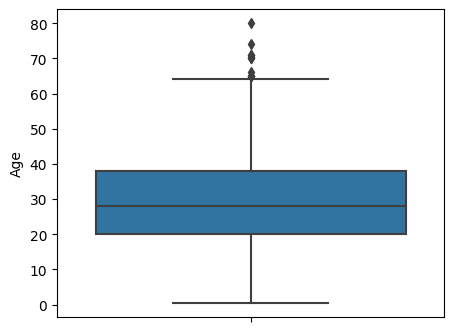

In [131]:
plt.figure(figsize=(5,4))
sns.boxplot(y="Age", data=full_data)
plt.show()

Este tipo de gráficas las podemos utilizar para una gran variedad de casos. Por ejemplo, en el caso en que queremos ver la edad de las personas de manera rápida, pero separándolas por género.

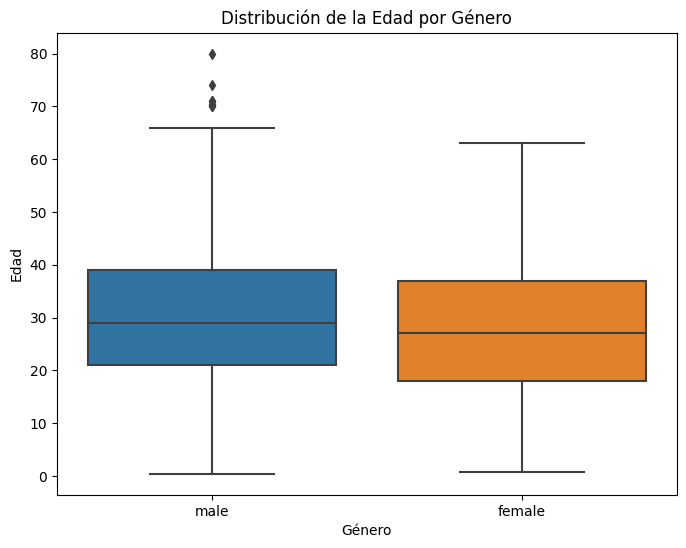

In [132]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Sex', y='Age', data=full_data)
plt.title('Distribución de la Edad por Género')
plt.xlabel('Género')
plt.ylabel('Edad')
plt.show()

Otro ejemplo: ver la edad de las personas, separándolas por género y abierto por sobreviviente: si (1) , no (0)

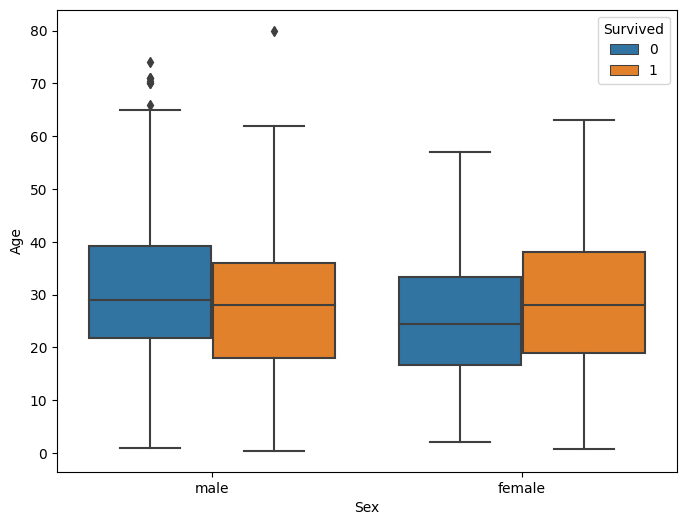

In [133]:
plt.figure(figsize=(8,6))
sns.boxplot(x="Sex", y="Age", hue="Survived", data=full_data)
plt.show()

**En las mujeres el promedio de edad de las sobrevientes fue mayor que las no sobrevientes, mientras que en el caso de los hombres fue al contrario**

### **Gráfico de Violin**

Es similar a un boxplot, pero además muestra la densidad de la distribución de la variable.
Ejemplo: Mostrar la distribución de la edad (Age) por clase (Pclass).

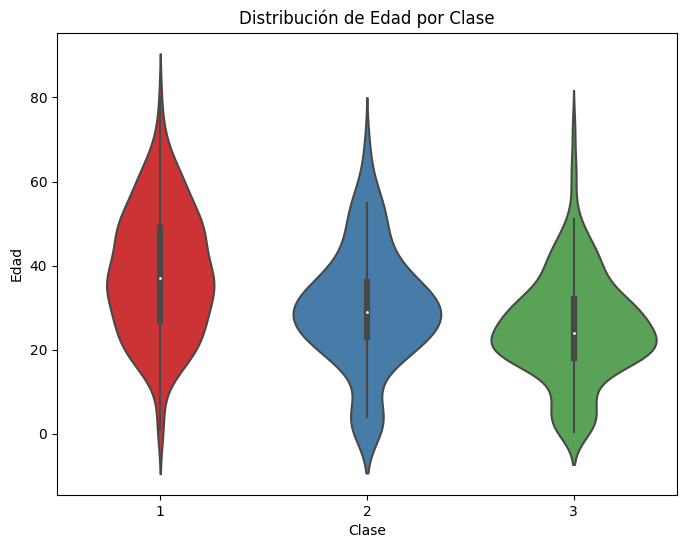

In [134]:
plt.figure(figsize=(8, 6))
sns.violinplot(x="Pclass", y="Age", data=full_data, palette="Set1")
plt.title('Distribución de Edad por Clase')
plt.xlabel('Clase')
plt.ylabel('Edad')
plt.show()

### **Ejercicio práctico 1**

hacer un gráfico que muestre la distribucion del numero de hermanos y conyuge por sitio de embarque. Use la gráfica que más le guste y genere al menos una conclusion de lo observado


In [135]:
### inserte su código aqui

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">2.3. Gráficos Relacionales</span>

Los gráficos relacionales son herramientas fundamentales en el análisis de datos que nos permiten explorar y visualizar cómo se relacionan dos o más variables entre sí. Estos gráficos son especialmente útiles para entender las asociaciones y patrones que pueden no ser evidentes al observar los datos en forma tabular, permitiendo una comprensión más profunda de cómo una variable afecta o se relaciona con otra. Son útiles para identificar tendencias, correlaciones, y patrones en los datos. 

##### **2. Tipos de Gráficos Relacionales:**

- **Gráfico de Dispersión (Scatter Plot):** Muestra la relación entre dos variables numéricas. Cada punto en el gráfico representa una observación en el conjunto de datos, con la posición en el eje X e Y correspondiente a los valores de las dos variables.
  
- **Gráfico de Líneas (Line Plot):** Ideal para visualizar la relación entre variables cuando una de ellas representa una medida de tiempo. Permite observar tendencias y cambios a lo largo del tiempo.
  
- **Gráfico de Relación (relplot):** Una función de Seaborn que permite crear gráficos de dispersión o de líneas con facilidad. La función <code>relplot()</code> es especialmente útil para crear gráficos que muestran cómo una variable se relaciona con otra, con opciones para ajustar el tipo de gráfico según el contexto.

### **Gráfico de dispersión (scatterplot)**

<strong>Scatter plot</strong> es un tipo de gráfico que se utiliza para visualizar la relación entre dos variables numéricas. Cada punto en el gráfico representa un par de valores de las dos variables, con una variable en el eje X y la otra en el eje Y. Este tipo de gráfico es muy útil para detectar patrones, tendencias, correlaciones, y posibles anomalías entre las dos variables.


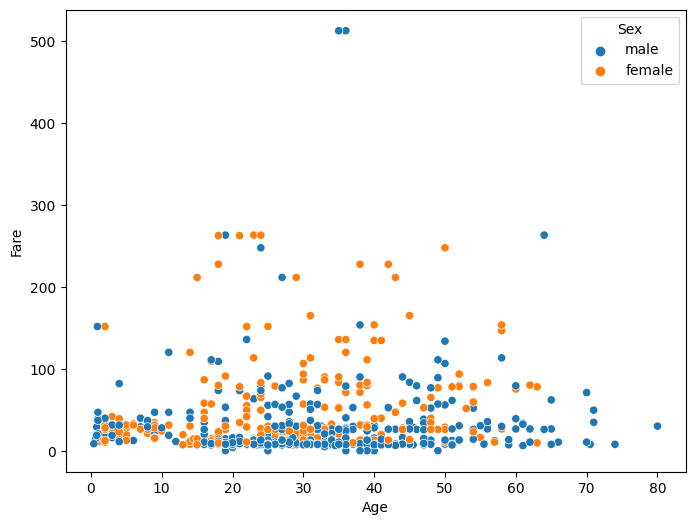

In [136]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="Age", y="Fare", hue="Sex", data=full_data)
plt.show()

### **Gráfico de lineas (lineplot)**


**Lineplot** es un tipo de gráfico utilizado para mostrar datos que varían a lo largo de un intervalo continuo, generalmente el tiempo. Es una de las herramientas más comunes en la visualización de datos y es ideal para mostrar tendencias, patrones o cambios en una variable dependiente en función de una variable independiente.Por defecto, el gráfico agrega sobre múltiples valores de **y** en cada valor de **x** y muestra una estimación de la tendencia central y un intervalo de confianza para esa estimación.

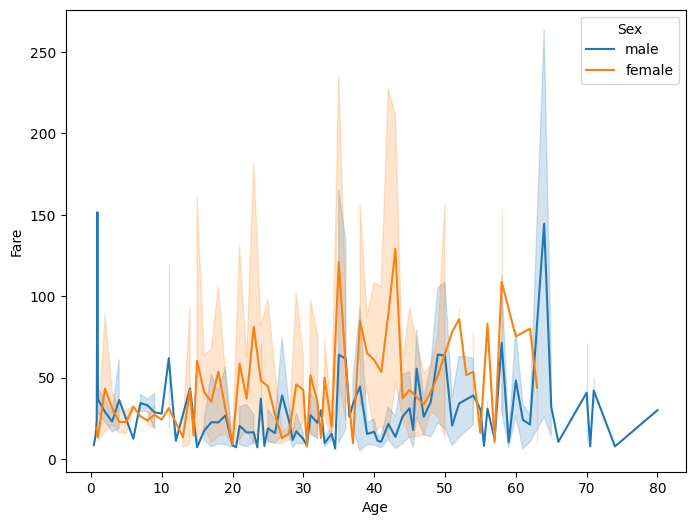

In [137]:
plt.figure(figsize=(8,6))
sns.lineplot(x="Age", y="Fare", hue="Sex", data=full_data)
plt.show()

###  **Stripplot**


Un **stripplot** es un tipo de gráfico que se utiliza para representar la distribución de una variable numérica a lo largo de una variable categórica mediante puntos.


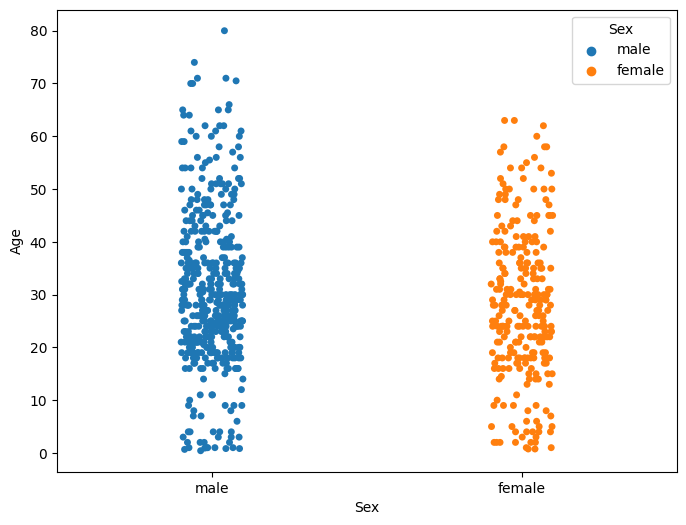

In [138]:
plt.figure(figsize=(8,6))
sns.stripplot(x="Sex", y="Age",hue='Sex', data=full_data)
plt.show()

### **swarmplot**

Un swarmplot es un tipo de gráfico en Seaborn que se utiliza para visualizar la distribución de datos categóricos mediante la disposición de puntos de forma que no se superpongan, a diferencia del stripplot, donde los puntos pueden solaparse. En un swarmplot, los puntos se dispersan de manera que cada uno de ellos sea visible, lo que facilita la interpretación de la distribución y la densidad de los datos dentro de cada categoría.


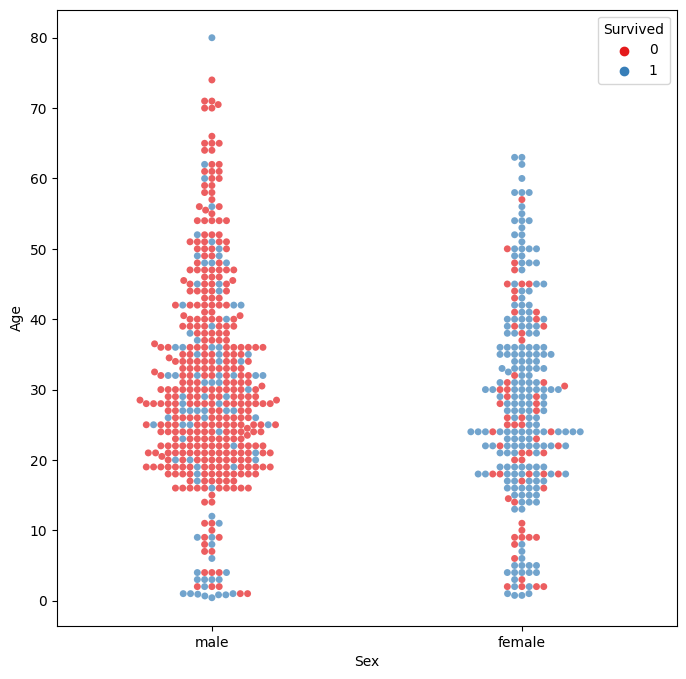

In [139]:
plt.figure(figsize=(8,8))
sns.swarmplot(x="Sex", y="Age",hue='Survived', data=full_data, palette = sns.color_palette("Set1"), alpha = 0.7)

plt.show()

* Podemos decir que la mayoría de los pasajeros tienen aproximadamente entre 18 y 30 años
* La mayoría de los pasajeros a bordo eran hombres
* la mayoría de los supervivientes fueron mujeres

###  **Pointplot**

Los gráficos de puntos</strong> sirven para lo mismo que los <strong>gráficos de barras</strong>, pero en un estilo diferente. En lugar de una barra completa, el valor de la estimación se representa mediante un punto a una cierta altura en el otro eje. Se utiliza para mostrar la relación entre dos variables categóricas y una variable numérica. Es una herramienta útil para visualizar comparaciones de medias, proporciones u otros agregados estadísticos entre diferentes grupos categóricos.
</div>

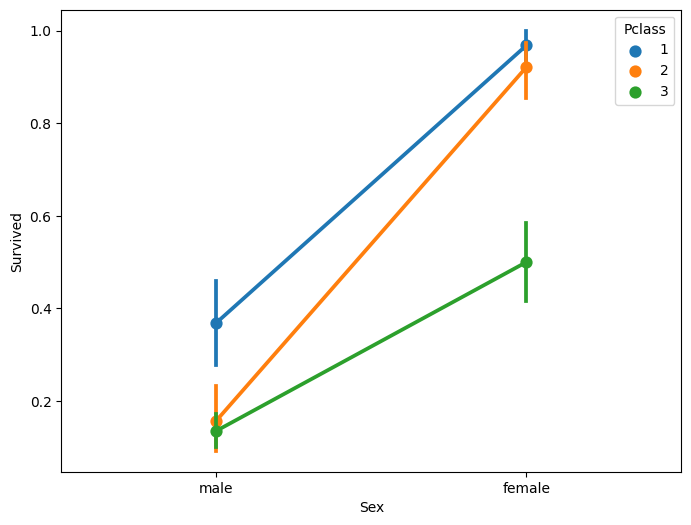

In [140]:
plt.subplots(figsize=(8, 6))
sns.pointplot(x="Sex", y="Survived", hue="Pclass", data=full_data)
plt.show()

**Podemos ver el número promedio de sobrevivientes de hombres y mujeres en cada clase. A partir del gráfico, podemos entender que una mayor proporsión de mujeres sobrevivió en comparación con los hombres. Tanto en hombres como en mujeres, la mayor cantidad de sobrevivientes proviene de la primera clase**

### **Matriz de correlación y mapas de calor (heatmap)**

Un heatmap o mapa de calor es un tipo de visualización gráfica que representa la magnitud de un fenómeno mediante el uso de colores en dos dimensiones. Es una herramienta útil para mostrar la relación entre dos variables (en los ejes X e Y) y para resaltar patrones, correlaciones, o distribuciones dentro de un conjunto de datos.

Ahora vamos a trazar la matriz de correlación de nuestros datos con un heatmap.

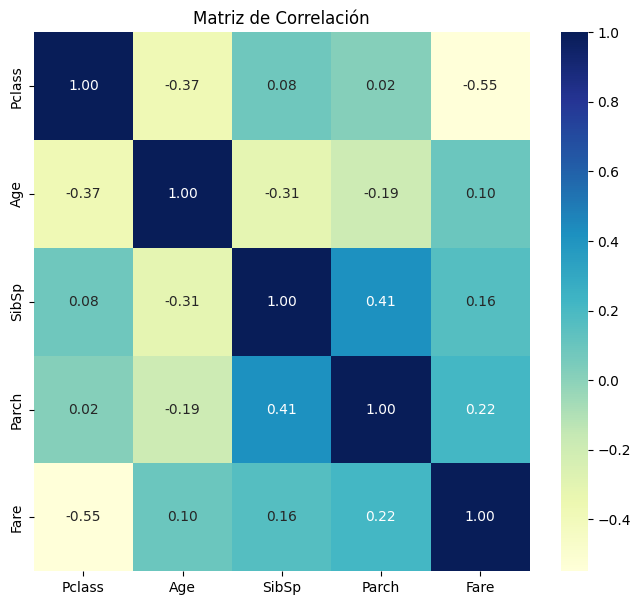

In [141]:
# Excluir campos por nombre
columnas_a_excluir = ['Name', 'PassengerId','Ticket','Survived']
data_analisis = full_data.drop(columns=columnas_a_excluir)

# Selecciona solo columnas numéricas
numeric_data = data_analisis.select_dtypes(include=['number'])

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear el heatmap
plt.figure(figsize=(8, 7))
sns.heatmap(correlation_matrix, cmap="YlGnBu", annot=True, fmt=".2f")
plt.title("Matriz de Correlación")
plt.show()

**Observamos que las correlaciones entre las variables son débiles.**

### **Gráfico de Contingencia (Heatmap de Variables Categóricas):**

Sirve para visualizar la relación entre dos variables categóricas.
Ejemplo: Mostrar la relación entre Pclass y Survived.

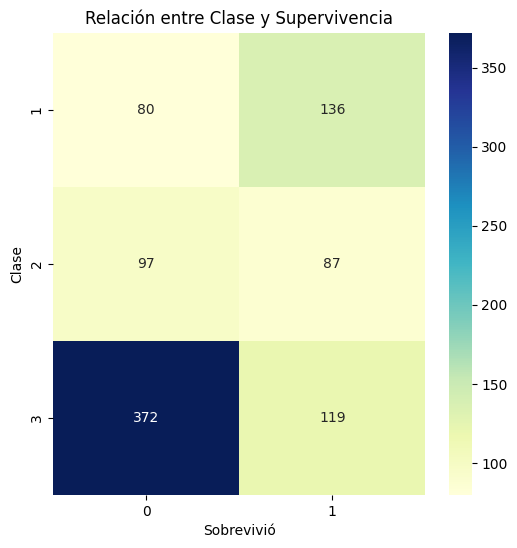

In [142]:
plt.figure(figsize=(6, 6))
contingency_table = pd.crosstab(full_data['Pclass'], full_data['Survived'])
sns.heatmap(contingency_table, annot=True, cmap="YlGnBu", fmt="d")
plt.title('Relación entre Clase y Supervivencia')
plt.xlabel('Sobrevivió')
plt.ylabel('Clase')
plt.show()

# Conclusiones

El análisis realizado con diversas visualizaciones gráficas proporcionó una comprensión detallada de los datos sobre los pasajeros. Los histogramas y gráficos categóricos ayudaron a desglosar la distribución de características como la edad, la tarifa, el género y la clase de los pasajeros. Los gráficos de regresión y el heatmap aportaron información sobre las relaciones entre variables, y las visualizaciones adicionales como los FacetGrids permitieron una exploración más profunda de los datos.

En general, las conclusiones revelan patrones y relaciones clave entre las variables, proporcionando una base sólida para realizar análisis adicionales o construir modelos predictivos en el futuro.

**Gracias y buena suerte**


### Ejercicio práctico 2

***seleccionar la respuesta correcta de las siguientes 5 preguntas sobre las diferencias y características de los diferentes tipos de gráficos para el análisis de un dataset.*** 


    1. ¿Cuál es la principal diferencia entre un histograma y un KDE plot al mostrar la distribución de una variable numérica?

###### a) Un histograma muestra barras que representan frecuencias, mientras que un KDE plot muestra una línea suave que estima la densidad.
###### b) Un KDE plot muestra datos categóricos, mientras que un histograma muestra datos numéricos.
###### c) Un histograma no muestra la distribución de datos, mientras que un KDE plot sí.
###### d) Un KDE plot es una representación 3D de los datos, mientras que un histograma es 2D.


    2.¿En qué situación es más útil un boxplot comparado con un violinplot?

###### a) Cuando se desea visualizar tanto la densidad como la forma detallada de la distribución.
###### b) Cuando se necesita comparar distribuciones entre varias categorías y destacar los cuartiles y los outliers.
###### c) Cuando se quiere visualizar la relación entre dos variables numéricas.
###### d) Cuando se necesita estimar la tendencia central de una sola variable.

    
    3.¿Cuál es la característica principal de un swarmplot en comparación con un stripplot?

###### a) Ambos gráficos son idénticos en funcionalidad y apariencia.
###### b) Un swarmplot ajusta la posición de los puntos para evitar solapamiento, mientras que un stripplot permite que los puntos se superpongan.
###### c) Un stripplot se utiliza para visualizar relaciones entre dos variables numéricas, mientras que un swarmplot se utiliza para datos categóricos.
###### d) Un stripplot es una visualización 3D de los datos, mientras que un swarmplot es 2D.

    4.¿Qué tipo de gráfico es más adecuado para mostrar la tendencia de una variable numérica a lo largo del tiempo?

###### a) Scatterplot
###### b) Boxplot
###### c) Lineplot
###### d) Heatmap


    5. Observando un heatmap que muestra las correlaciones entre varias variables en un dataset, identificas que la correlación entre la variable 'Edad' y 'Ingreso Mensual' es de -0.75. ¿Qué significa este valor y cómo lo interpretarías en el contexto de un análisis de datos?

###### a) Existe una fuerte correlación positiva entre 'Edad' y 'Ingreso Mensual', lo que significa que a medida que aumenta la edad, también aumenta el ingreso mensual.
###### b) Existe una fuerte correlación negativa entre 'Edad' y 'Ingreso Mensual', lo que indica que a medida que aumenta la edad, el ingreso mensual tiende a disminuir.
###### c) No hay ninguna relación significativa entre 'Edad' y 'Ingreso Mensual', ya que el valor de correlación es cercano a 0.
###### d) La correlación entre 'Edad' y 'Ingreso Mensual' no se puede determinar con el valor proporcionado.

<a id="modelos-clasificacion"></a>

# **Capítulo 3: Algoritmos de Clasificación Titanic**

Hoy vamos a adentrarnos en una de las áreas más fundamentales y poderosas del aprendizaje automático: la clasificación. Imaginen por un momento que son los responsables de tomar decisiones críticas en una empresa, donde deben determinar si un cliente se quedará o abandonará el servicio, si un correo electrónico es spam o no, o incluso si una transacción es fraudulenta. Todas estas decisiones dependen de la capacidad para clasificar correctamente la información que tienen a su disposición.


<figure>
    <center>
        <img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/titanic_classification.png' width="700" height="450" />
        <figcaption></figcaption>
    </center>
</figure>

### **Introducción a la Clasificación Binaria: El Desafío del Titanic**

#### ¿Por Qué Clasificación Binaria?

La clasificación binaria es un tipo de tarea de aprendizaje automático en la que el objetivo es predecir uno de dos resultados posibles. En el conjunto de datos del Titanic, nuestro objetivo es predecir si un pasajero sobrevivió o no. Este es un ejemplo clásico de un problema de clasificación binaria, donde la variable objetivo es categórica con dos clases: "Sobrevivió" y "No Sobrevivió."

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/emoji_clasificacion.png' width="550" height="250" />
<figcaption></figcaption></center>
</figure>

¡Vamos a embarcarnos en este viaje para desentrañar los secretos del conjunto de datos del Titanic y mejorar nuestras habilidades en clasificación binaria!

In [143]:
full_data.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [144]:
df_0.head(3)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,S,0,0,1
1,1,1,0,38.0,1,0,65.6344,C,1,0,0
2,1,3,0,26.0,0,0,7.9250,S,0,0,1


In [145]:
# Conteo de la variable 'Churn Value'
print(df_0["Survived"].value_counts())
print(df_0["Survived"].value_counts(10))

0    549
1    342
Name: Survived, dtype: int64
0    0.616162
1    0.383838
Name: Survived, dtype: float64


<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.1. Conjunto de Entrenamiento y Prueba</span>

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/Entrenamiento_prueba.png' width="950" height="400" />
<figcaption></figcaption></center>
</figure>

 1. **Clientes (Base de Datos)**: Es como una lista de todos tus clientes. Cada cliente tiene información sobre si han cancelado el servicio (churn) o no.

**¿Cómo funciona?**

* Entrenar: Usamos X_train (información de clientes) y y_train (si cancelaron o no) para enseñar al modelo. Es como cuando practicas para un examen usando algunos ejercicios.

* Probar: Luego, usamos X_test (nueva información de clientes) y y_test (resultados reales si cancelaron o no) para ver si el modelo predice correctamente. Es como tomar el examen real después de haber practicado.

En resumen, entrenar es como estudiar, y probar es como hacer el examen para ver si aprendiste bien.

In [146]:
# Separar características y variable objetivo
X = df_0.drop(columns=['Survived','Embarked','Embarked_Q']) 
y = df_0['Survived']

In [147]:
# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.2. Evaluación de Métricas: Precision, Recall & Accuracy</span>

En el contexto de la clasificación binaria, como el análisis del conjunto de datos del Titanic, es crucial evaluar cómo de bien está funcionando nuestro modelo al identificar las instancias correctas. En este ejercicio, estamos particularmente interesados en la métrica de **Recall**. Optimizar el **Recall** es importante porque queremos identificar el mayor número posible de pasajeros que sobrevivieron, lo cual es fundamental para evaluar cómo el modelo puede mejorar la identificación de sobrevivientes.

A continuación, se detallan tres métricas importantes:

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/metricas_desempeno.png' width="900" height="450" />
<figcaption></figcaption></center>
</figure>

* **Precision:** ¿De las predicciones positivas de mi algoritmo, cuántas son realmente positivas? En el contexto del Titanic, ¿de todas las veces que el modelo predice que un pasajero sobrevivirá, cuántos realmente sobreviven?

* **Recall (Sensibilidad):** ¿De todos los casos actuales, cuántos logra identificar mi algoritmo? De todos los pasajeros que realmente sobrevivieron, ¿cuántos logra identificar correctamente mi modelo?

* **Accuracy (Exactitud):** ¿Qué tan bien predice el modelo en general? ¿Cuántas de las predicciones totales son correctas? En el contexto del Titanic, de todas las predicciones que hace el modelo (sobrevivió o no sobrevivió), ¿cuántas son correctas?


## **Ejercicio práctico 1** 

**Ejemplo 1: Detección de Defectos en una Línea de Producción de Fabricación**

---

**Ejemplo 2: Detección de Fraude en Transacciones Bancarias**

---

**Ejemplo 3: Diagnóstico Médico Automatizado**

---

 **Ejemplo 4: Filtrado de Correos Electrónicos (Spam)**

---

 **Ejemplo 5: Sistema de Recomendación de Contenido**


<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.4.1 Regresión Logística </span>

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/logistic_regression.png' width="800" height="400" />
<figcaption></figcaption></center>
</figure>

La **regresión logística** es un modelo estadístico utilizado para predecir la probabilidad de una variable dependiente categórica, generalmente binaria. A diferencia de la regresión lineal, que se utiliza para variables continuas, la regresión logística estima la probabilidad de que un evento ocurra mediante una función logística, que transforma la salida lineal del modelo en una probabilidad entre 0 y 1. Esta técnica es ampliamente utilizada en problemas de clasificación, como la detección de fraude, diagnóstico médico y análisis de mercado.

En el contexto de aprendizaje automático, la regresión logística es valorada por su simplicidad y eficacia. Aunque se basa en un supuesto de relación lineal entre las características y la probabilidad de la clase positiva, su capacidad para manejar variables independientes e interpretar la importancia de las características la hace útil en una variedad de aplicaciones. La salida del modelo puede ser interpretada como una probabilidad, lo que facilita la toma de decisiones basadas en umbrales de probabilidad ajustables.

### **Entrenamiento del modelo**

In [148]:
# Entrenar modelo de regresión logística
model = LogisticRegression(max_iter=2000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=2000)

In [149]:
# Predicciones
y_pred_train_lr = model.predict(X_train)
y_pred_test_lr = model.predict(X_test)

In [150]:
# Add a constant to the model (intercept)
X = sm.add_constant(X_train)
model = sm.Logit(y_train, X)
result = model.fit()

# Print the summary
print(result.summary())

Optimization terminated successfully.
         Current function value: 0.445915
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               Survived   No. Observations:                  712
Model:                          Logit   Df Residuals:                      703
Method:                           MLE   Df Model:                            8
Date:                Thu, 05 Sep 2024   Pseudo R-squ.:                  0.3328
Time:                        14:09:03   Log-Likelihood:                -317.49
converged:                       True   LL-Null:                       -475.84
Covariance Type:            nonrobust   LLR p-value:                 1.142e-63
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.9078      0.840      5.846      0.000       3.262       6.553
Pclass        -1.0429      0.

In [151]:
def compute_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred):
    
    # Accuracy for training and test set
    accuracy_train = round(100.0 * accuracy_score(y_train_true, y_train_pred), 2)
    accuracy_test = round(100.0 * accuracy_score(y_test_true, y_test_pred), 2)
    
    # Compute the classification report
    report_test = classification_report(y_test_true, y_test_pred, output_dict=True)
    report_train = classification_report(y_train_true, y_train_pred, output_dict=True)
    
    # Extract precision, recall score for class 1
    precision_train = round(report_train['1']['precision'], 3)
    recall_train = round(report_train['1']['recall'], 3)

    precision_test = round(report_test['1']['precision'], 3)
    recall_test = round(report_test['1']['recall'], 3)
    
    # Create a DataFrame with the metrics
    metrics_df = pd.DataFrame({
        'accuracy': [accuracy_train, accuracy_test],
        'precision': [precision_train, precision_test],
        'recall': [recall_train, recall_test]
    }, index=['train', 'test'])
    
    return metrics_df


def plot_confusion_matrices_and_reports(y_train_true, y_train_pred, y_test_true, y_test_pred):
    
    # Calculate metrics
    metrics_df = compute_metrics(y_train_true, y_train_pred, y_test_true, y_test_pred)

    # Evaluation for the training set
    train_conf_matrix = confusion_matrix(y_train_true, y_train_pred)
    
    # Evaluation for the test set
    test_conf_matrix = confusion_matrix(y_test_true, y_test_pred)
    
    def plot_confusion_matrix(cm, metrics, title='Matriz de Confusión', cmap=plt.cm.Blues):
        fig, axes = plt.subplots(1, 2, figsize=(8, 4))

        # Plot confusion matrix
        sns.heatmap(cm, annot=True, fmt='d', cmap=cmap, 
                    xticklabels=['No Sobr.', 'Sobr.'], 
                    yticklabels=['No Sobr.', 'Sobr.'], ax=axes[0])
        axes[0].set_title(title)
        axes[0].set_xlabel('Predicción')
        axes[0].set_ylabel('Real')

        # Formatea las métricas en una cadena de texto
        metrics_text = f"Accuracy: {metrics['accuracy']/100:.3f} - ({metrics['accuracy']:.1f}%)\n"
        metrics_text += f"Precision: {metrics['precision']:.3f} - ({metrics['precision']*100:.1f}%)\n"
        metrics_text += f"Recall: {metrics['recall']:.3f} - ({metrics['recall']*100:.1f}%)\n"
        
        # Añade el texto formateado
        axes[1].axis('off')
        axes[1].text(0.5, 0.5, metrics_text, horizontalalignment='center', 
                    verticalalignment='center', fontsize=12)

        plt.tight_layout()
        plt.show()

    # Plot confusion matrix and report for training set
    plot_confusion_matrix(train_conf_matrix, metrics_df.loc['train'], title='Matriz de Confusión - Entrenamiento',  cmap=plt.cm.Blues)

    # Plot confusion matrix and report for test set
    plot_confusion_matrix(test_conf_matrix, metrics_df.loc['test'], title='Matriz de Confusión - Prueba', cmap=plt.cm.Greens)

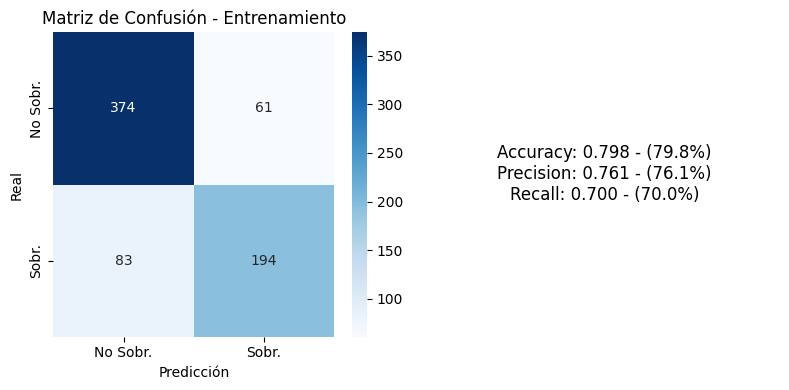

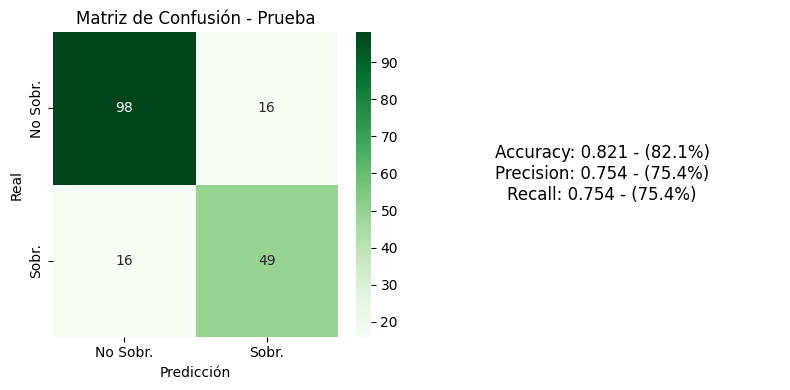

In [152]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrices_and_reports(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.4.2 Árboles de Decisión </span>

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/decision_tree.png' width="600" height="300" />
<figcaption></figcaption></center>
</figure>

Un **árbol de decisión** es un modelo de aprendizaje automático utilizado para tareas de clasificación y regresión. En problemas de clasificación binaria, se usa para predecir a qué una de dos clases pertenece una muestra. El algoritmo divide los datos en nodos basados en preguntas sobre características específicas, con nodos internos representando las pruebas y nodos de hoja mostrando las clasificaciones finales. Utiliza criterios como la **impureza de Gini** o la **entropía** para decidir cómo dividir los datos. Sus ventajas incluyen una alta **interpretabilidad** y la no necesidad de normalización de datos, pero puede sufrir de **sobreajuste** y sensibilidad a pequeñas variaciones. Es útil para clasificar datos en dos categorías de manera clara y comprensible.




## **Entrenamiendo del Modelo**

In [153]:
# Entrenar el árbol de decisión con un límite de profundidad
clf = DecisionTreeClassifier(max_depth=3, random_state=0)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=0)

In [154]:
# Predicciones
y_pred_train_dt = clf.predict(X_train)
y_pred_test_dt = clf.predict(X_test)

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/arbol_titanic.png' width="1200" height="600" />
<figcaption></figcaption></center>
</figure>


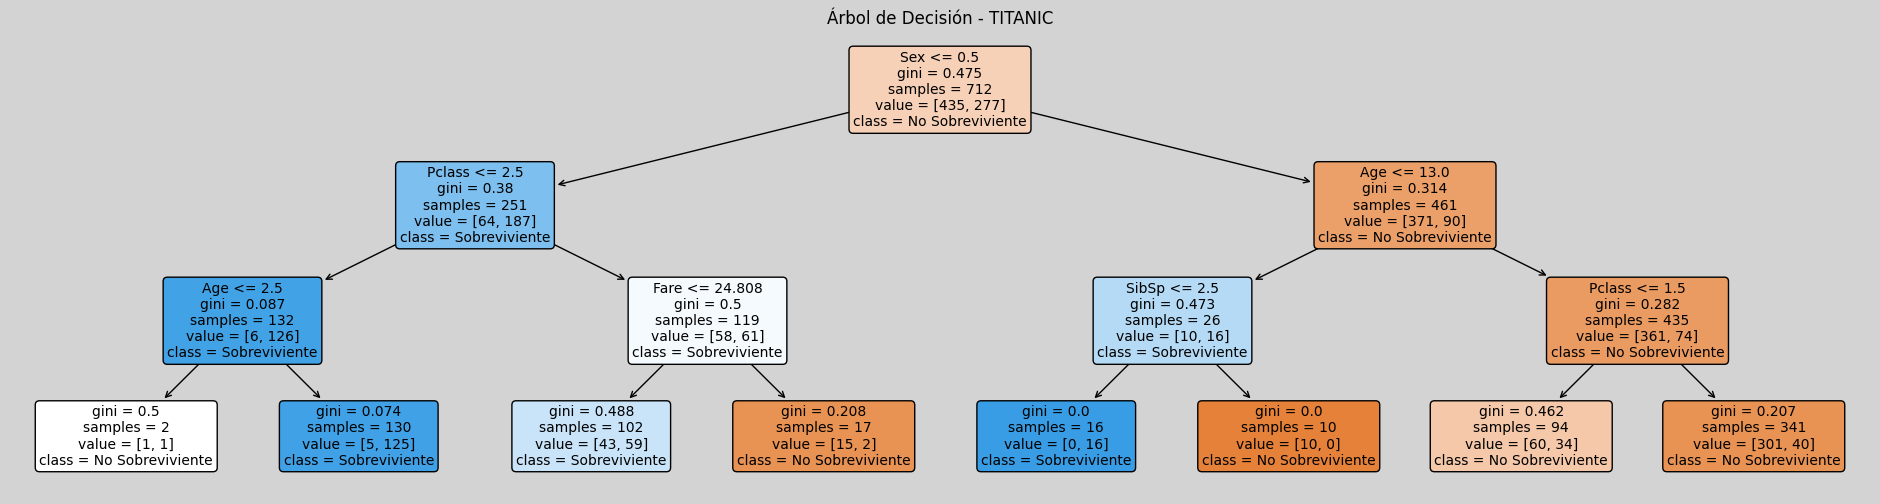

In [155]:
# Configurar el tamaño de la figura
plt.figure(figsize=(24, 6))
plt.gcf().patch.set_facecolor('lightgrey')

# Visualizar el árbol de decisión
plot_tree(clf, 
          filled=True, 
          feature_names=X_train.columns, 
          class_names=['No Sobreviviente', 'Sobreviviente'], 
          rounded=True, 
          fontsize=10)  

plt.title('Árbol de Decisión - TITANIC')
plt.show()

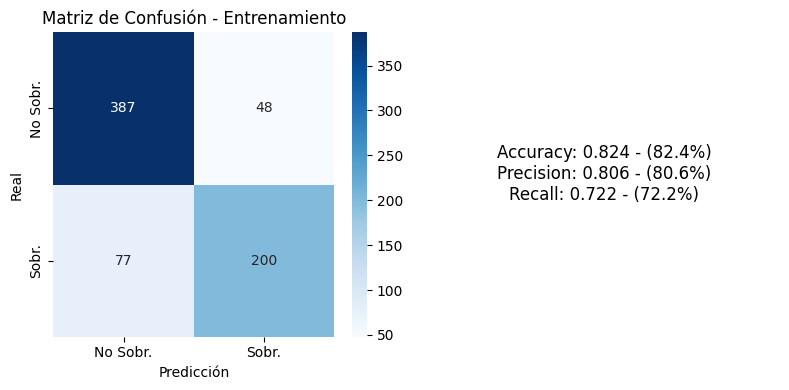

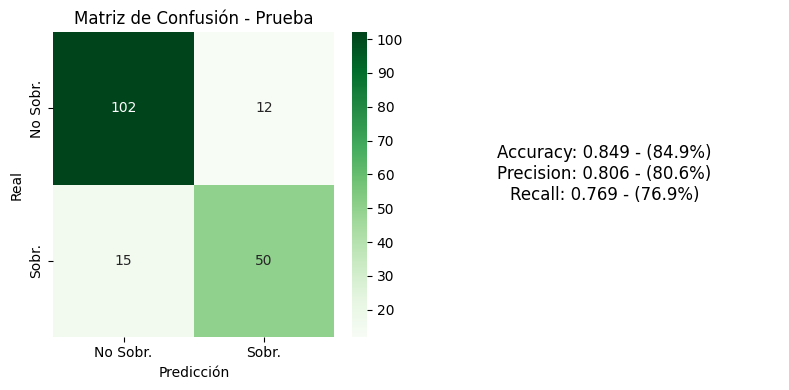

In [156]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrices_and_reports(y_train, y_pred_train_dt, y_test, y_pred_test_dt)    

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.4.3. Random Forest </span>

<figure>
<center>
<img src='/BOBJ/storage/JMPA/Bootcamp/Data/Images/random_forest_2.png?raw=tru' width="550" height="350" />
<figcaption></figcaption></center>
</figure>

Un Random Forest es un modelo de aprendizaje automático que usa un grupo de árboles de decisión para hacer predicciones.

**¿Cómo funciona?**

1. Árboles de Decisión: Un árbol de decisión toma decisiones de forma jerárquica, dividiendo los datos en diferentes categorías basadas en características.

2. Bosque Aleatorio: En lugar de un solo árbol, Random Forest crea muchos árboles de decisión (un "bosque") y los combina para hacer una predicción más precisa y estable.

3. Promedio de Resultados: Para la clasificación, el modelo vota por la categoría más común entre los árboles. Para la regresión, promedia las predicciones de todos los árboles.

Ventajas

* Menos Riesgo de Sobreajuste: Combina múltiples árboles, lo que reduce el riesgo de que el modelo se ajuste demasiado a los datos de entrenamiento.
* Precisión Mejorada: Generalmente, proporciona predicciones más precisas que un solo árbol de decisión.
* En resumen, Random Forest es como pedir la opinión de muchos expertos (árboles de decisión) y tomar una decisión basada en la mayoría.


### **Entrenamiento del modelo**

In [157]:
## Generación del modelo
rf_model = RandomForestClassifier(random_state = 120, n_estimators=22, max_samples=0.6, max_depth=5)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, max_samples=0.6, n_estimators=22,
                       random_state=120)

In [158]:
# Predicciones
y_pred_train_rf = rf_model.predict(X_train)
y_pred_test_rf = rf_model.predict(X_test)

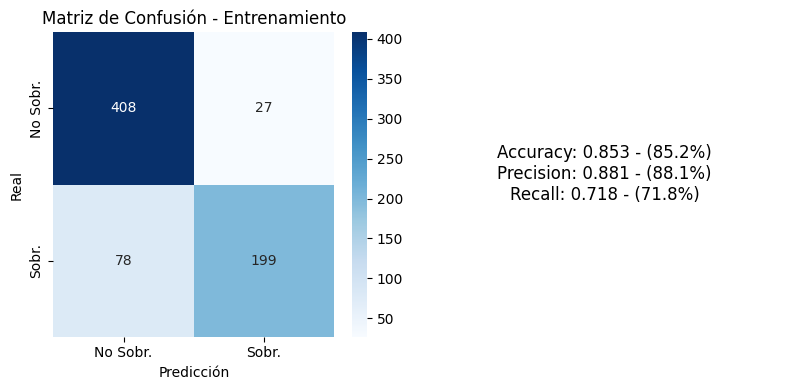

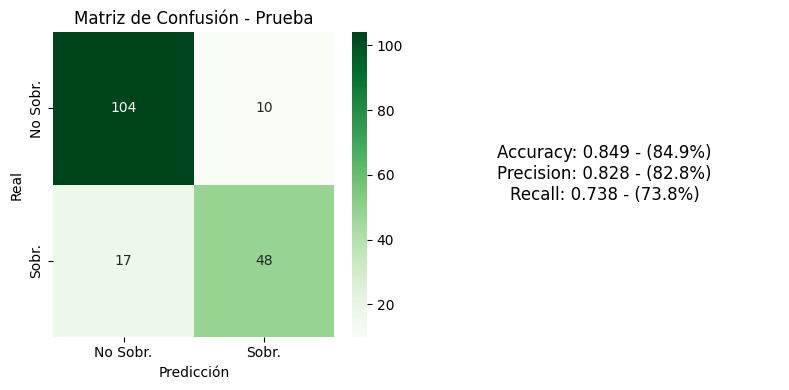

In [159]:
# Comparando resultados en conjunto de Entrenamiento vs Prueba
plot_confusion_matrices_and_reports(y_train, y_pred_train_rf, y_test, y_pred_test_rf)  

<Figure size 1200x800 with 0 Axes>

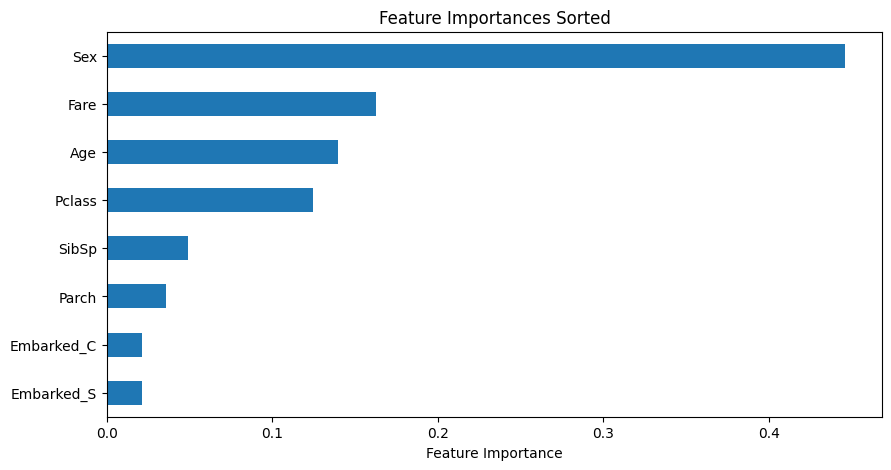

In [160]:
# Gráfico de las variables mas relevantes
df_imp_rf = pd.DataFrame(rf_model.feature_importances_.reshape(1,-1), 
                         columns=X_train.columns, 
                         index=["Feature Importances"])

# Transpose and sort by feature importance
df_imp_rf = df_imp_rf.T.sort_values(by="Feature Importances", ascending=True)

# Increase the figure size and reduce the font size for y-axis labels
plt.figure(figsize=(12, 8))  # Adjust the figsize as needed
ax = df_imp_rf.plot.barh(legend=False)

# Set smaller font size for the y-axis labels
ax.set_yticklabels(df_imp_rf.index, fontsize=10)  # Adjust fontsize as needed

plt.xlabel('Feature Importance')
plt.title('Feature Importances Sorted')
plt.show()

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.5. Comparación Modelos </span>

Ahora, vamos a contruir un dataframe unificado con las metricas que hemos calculado y guardado para cada modelo con el fin de poder comparar:

In [161]:
# Métricas para Regresión Logística
metrics_lr = compute_metrics(y_train, y_pred_train_lr, y_test, y_pred_test_lr)

# Métricas para Random Forest
metrics_rf = compute_metrics(y_train, y_pred_train_rf, y_test, y_pred_test_rf)

# Métricas para Decision Tree
metrics_dt = compute_metrics(y_train, y_pred_train_dt, y_test, y_pred_test_dt)

In [162]:
# Creación de un DataFrame unificado con las métricas de cada modelo construido
models_summary = pd.DataFrame({
    'Model': ['Logistic Regression', 'Random Forest Clasiffier', 'Decision Tree'],
    'Accuracy Train': [metrics_lr.loc['train', 'accuracy'], metrics_rf.loc['train', 'accuracy'], metrics_dt.loc['train', 'accuracy']],
    'Accuracy Test': [metrics_lr.loc['test', 'accuracy'], metrics_rf.loc['test', 'accuracy'], metrics_dt.loc['test', 'accuracy']],
    'Precision Sobrevivientes': [metrics_lr.loc['train', 'precision'], metrics_rf.loc['train', 'precision'], metrics_dt.loc['train', 'precision']],
    'Recall Sobrevivientes': [metrics_lr.loc['train', 'recall'], metrics_rf.loc['train', 'recall'], metrics_dt.loc['train', 'recall']]
})

# Ordenar el DataFrame por la columna de Recall
models_summary.sort_values(by='Recall Sobrevivientes', ascending=False)

,Model,Accuracy Train,Accuracy Test,Precision Sobrevivientes,Recall Sobrevivientes
2,Decision Tree,82.44,84.92,0.806,0.722
1,Random Forest Clasiffier,85.25,84.92,0.881,0.718
0,Logistic Regression,79.78,82.12,0.761,0.700


Con base en los resultados de la tabla, se pueden extraer las siguientes conclusiones concretas:

1. **Árbol de Decisión**: Este modelo ofrece un buen equilibrio entre todas las métricas, con un **recall de 0.722** para los sobrevivientes, lo que significa que identifica correctamente el 72% de los sobrevivientes. Aunque su precisión es más baja que la del clasificador Random Forest, el mayor valor de recall sugiere que es menos probable que pase por alto a los sobrevivientes, lo cual es crucial en el contexto del Titanic.

2. **Regresión Logística**: A pesar de que tiene el mismo **Accuracy Test (82.12%)** que el Árbol de Decisión, su **recall (0.700)** es ligeramente menor, lo que implica que identifica menos sobrevivientes en comparación con el Árbol de Decisión. Esto lo hace menos adecuado si el objetivo principal es capturar la mayor cantidad de sobrevivientes.

3. **Random Forest Classifier**: Este modelo tiene el mejor **Accuracy Test (84.92%)** y la mayor **precisión (0.88)**, lo que indica que, de las predicciones de sobrevivencia que hace, la mayoría son correctas. Sin embargo, tiene un **recall más bajo (0.738)** en comparación con el Árbol de Decisión, lo que sugiere que no detecta tantos sobrevivientes como el modelo de Árbol de Decisión. Esto podría resultar en que algunos sobrevivientes no sean identificados por este modelo.

### Conclusión

El modelo de **Árbol de Decisión** es la opción más adecuada en este contexto, ya que maximiza el **recall**, asegurando que la mayor cantidad de sobrevivientes posibles sean identificados. Aunque otros modelos presentan un mayor accuracy y precisión, el enfoque en el recall es crítico para minimizar el riesgo de pasar por alto a sobrevivientes.

<span style="color: #007BFF; font-size: 24px; font-weight: bold; border: 2px solid #007BFF; padding: 10px; background-color: #EFEFEF; display: block; width: 100%;">3.6. Calificación de una nueva base </span>


### **Ejercicio práctico 2:** 

Mencione algunos de los pasos necesarios (3 o más), antes de calificar una nueva base?, Explique en que consisten 


<figure>
<center>
<img src='https://historysshadow.wordpress.com/wp-content/uploads/2014/09/arcona.jpg' width="600" height="300" />
<figcaption></figcaption></center>
</figure>



In [163]:
new_data = pd.read_csv('/BOBJ/storage/JMPA/Bootcamp/Data/Inputs/New_data.csv')

In [164]:
print(new_data.shape)
print("")
#Crear un DataFrame con el resumen
summary_df = pd.DataFrame({
    'Valores Nulos': new_data.isnull().sum(),
    'Valores Únicos': new_data.nunique(),
    'Tipo de Dato': new_data.dtypes
})

# Mostrar la tabla
print(summary_df)
print("")
new_data.head()

(418, 11)

             Valores Nulos  Valores Únicos Tipo de Dato
PassengerId              0             418        int64
Pclass                   0               3        int64
Name                     0             418       object
Sex                      0               2       object
Age                     86              79      float64
SibSp                    0               7        int64
Parch                    0               8        int64
Ticket                   0             363       object
Fare                     1             169      float64
Cabin                  327              76       object
Embarked                 0               3       object



,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Para calificar la nueva base de datos de pasajeros del Titanic, es fundamental aplicar una serie de transformaciones que aseguren la coherencia y calidad de los datos, así como su compatibilidad con el modelo de predicción entrenado. A continuación, se describen las transformaciones necesarias:

1. **Categoría Ordinal para 'Pclass'**: Convertimos la columna `Pclass` a una categoría ordinal para reflejar el orden natural de las clases (1, 2, 3), lo cual es importante para que el modelo interprete correctamente esta variable.

2. **Imputación de Edad por Promedio de Clase y Género**: Aplicamos una función de imputación que rellena los valores faltantes de la columna `Age` utilizando la media de edad de cada combinación de clase y género, mejorando así la precisión de las predicciones al mantener patrones realistas de edad.

3. **Manejo de Valores Faltantes en 'Fare'**: Filtramos los registros que contienen valores nulos en `Fare`, ya que esta variable es crucial para la predicción y no puede contener valores faltantes.

4. **One-Hot Encoding para 'Embarked'**: Realizamos una codificación one-hot en la columna `Embarked` para convertirla en variables binarias, facilitando la interpretación de esta variable categórica por parte del modelo. Rellenamos los valores faltantes con la moda antes de aplicar la codificación.

5. **Label Encoding para 'Sex'**: Codificamos la variable `Sex` usando un Label Encoder para transformar los valores categóricos en números, permitiendo que el modelo interprete la información de género.

6. **Eliminación de Variables Irrelevantes**: Eliminamos columnas como `PassengerId`, `Name`, `Ticket`, `Cabin` y `Embarked` (ya codificada), ya que no son necesarias para el modelo y podrían introducir ruido en la predicción.

7. **Tratamiento de outliers para variable Fare**: se utilizan métodos a partir de rangos intercuartilicos para transformación de outliers.

Estas transformaciones son esenciales para preparar los datos de entrada de manera que sean consistentes con el conjunto de datos de entrenamiento del modelo, mejorando así la precisión y utilidad de las predicciones.


In [165]:
# variable categorica ordinal Pclass
pclass_categories = [1, 2, 3]  # Define el orden de las clases
new_data['Pclass'] = pd.Categorical(new_data['Pclass'], categories=pclass_categories, ordered=True) 

#imputación edad por promedio Clase y género
new_data['Age'] = new_data.groupby(['Sex', 'Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

# filtramos valores na para Fare
new_data = new_data[new_data.Fare.notna()]

# Aplicamos One Hot Encoding a la columna 'Embarked'
new_data['Embarked'] = new_data['Embarked'].fillna(new_data['Embarked'].mode()[0])
embarked_dummies = pd.get_dummies(new_data['Embarked'], prefix='Embarked')
new_data = pd.concat([new_data, embarked_dummies], axis=1)

# label encoder variable género
cat_features = ['Sex']
# Codificar variables categóricas
label_encoders = {}
for col in cat_features:
    le = LabelEncoder()
    new_data[col] = le.fit_transform(new_data[col].astype(str))
    label_encoders[col] = le

# Eliminamos variables no necesarias para la calificación de nuestro árbol de decisión
new_data_00 = new_data.drop(columns=['PassengerId','Name','Ticket','Cabin','Embarked','Embarked_Q']) 

In [166]:
print(new_data_00.shape)
print("")
print(new_data_00.isnull().sum())
print("")
new_data_00.head()

(417, 8)

Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_C    0
Embarked_S    0
dtype: int64



,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_S
0,3,1,34.5,0,0,7.8292,0,0
1,3,0,47.0,1,0,7.0000,0,1
2,2,1,62.0,0,0,9.6875,0,0
3,3,1,27.0,0,0,8.6625,0,1
4,3,0,22.0,1,1,12.2875,0,1


## **Predicción de nuevos datos transformados**

In [167]:
y_prob_new_Ship = clf.predict_proba(new_data_00)[:, 1]
y_pred_new_Ship = clf.predict(new_data_00)

In [168]:
# Agregar las probabilidades al DataFrame
new_data['Probabilidad_Supervivencia'] = y_prob_new_Ship
new_data['Prediccion'] = y_pred_new_Ship

new_data.head(20)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S,Probabilidad_Supervivencia,Prediccion
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q,0,1,0,0.117302,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S,0,0,1,0.578431,1
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0.117302,0
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0.117302,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,0.578431,1
5,897,3,"Svensson, Mr. Johan Cervin",1,14.0,0,0,7538,9.2250,NaN,S,0,0,1,0.117302,0
6,898,3,"Connolly, Miss. Kate",0,30.0,0,0,330972,7.6292,NaN,Q,0,1,0,0.578431,1
7,899,2,"Caldwell, Mr. Albert Francis",1,26.0,1,1,248738,29.0000,NaN,S,0,0,1,0.117302,0
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",0,18.0,0,0,2657,7.2292,NaN,C,1,0,0,0.578431,1
9,901,3,"Davies, Mr. John Samuel",1,21.0,2,0,A/4 48871,24.1500,NaN,S,0,0,1,0.117302,0


# Análisis de Supervivencia de Pasajeros del Titanic

Basado en los resultados de la predicción para los nuevos pasajeros del Titanic, se pueden extraer algunas conclusiones relevantes sobre las probabilidades de supervivencia según diferentes características demográficas y socioeconómicas:

1. **Mujeres en Primera Clase**:  
   Las pasajeras femeninas que viajan en primera clase presentan las probabilidades de supervivencia más altas. Por ejemplo, `Snyder, Mrs. John Pillsbury` y `Chaffee, Mrs. Herbert Fuller`, ambas en primera clase, tienen una probabilidad de supervivencia del 100%. Esto refleja el patrón histórico de priorización de mujeres y niños durante las evacuaciones, junto con las mejores condiciones de seguridad de la primera clase.

2. **Pasajeros de Clase Baja y de Sexo Masculino**:  
   Los hombres que viajan en tercera clase tienen las probabilidades de supervivencia más bajas. Por ejemplo, `Kelly, Mr. James`, un hombre en tercera clase, tiene una probabilidad de supervivencia de solo 6.1%. Esto está en línea con la historia del Titanic, donde los hombres en tercera clase tuvieron una tasa de supervivencia significativamente más baja, debido a factores como el acceso limitado a los botes salvavidas y las políticas de evacuación de la época.

3. **Efecto del Género y Clase en la Supervivencia**:  
   De manera general, las mujeres tienen mayores probabilidades de sobrevivir en comparación con los hombres, independientemente de la clase en la que viajan. Por ejemplo, `Hirvonen, Mrs. Alexander` (mujer, tercera clase) tiene una probabilidad de supervivencia de 61.5%, en contraste con `Wirz, Mr. Albert` (hombre, tercera clase) cuya probabilidad de supervivencia es de solo 13.5%. Este hallazgo subraya cómo tanto el género como la clase son factores cruciales en la determinación de las probabilidades de supervivencia.

4. **Pasajeros con Familiares a Bordo**:  
   Algunos pasajeros con familiares a bordo (reflejados en las columnas `SibSp` y `Parch`), como `Wilkes, Mrs. James`, tienen baja probabilidad de supervivencia (0%), lo que puede sugerir que el tamaño del grupo familiar no siempre correlaciona con una mayor o menor probabilidad de supervivencia en este conjunto de datos, posiblemente debido a factores de confusión como el género y la clase.

5. **Pasajeros con Tarifa Baja**:  
   Aquellos pasajeros con tarifas más bajas, como `Assaf, Mr. Gerios` (7.2250) y `Assaf Khalil, Mrs. Mariana` (7.2250), tienen probabilidades de supervivencia muy bajas (0% y 13.5%, respectivamente). Esto indica una correlación entre tarifas bajas y menores probabilidades de supervivencia, lo que podría estar relacionado con su ubicación en el barco y la velocidad a la que se les permitió evacuar.

Estas conclusiones refuerzan el conocimiento histórico y social sobre los factores que influyeron en las tasas de supervivencia del Titanic y subrayan la importancia de las características demográficas, como el género y la clase social, en la determinación de los resultados de supervivencia.



<figure>
<center>
<img src='https://ichef.bbci.co.uk/ace/ws/800/cpsprodpb/48F4/production/_107767681_5-1.jpg.webp' width="800" height="400" />
<figcaption></figcaption></center>
</figure>
